In [224]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot

from google.cloud import bigquery

In [225]:
bqclient = bigquery.Client(project='charged-genre-350106')

In [226]:
query_erp= """
SELECT
    *
FROM
  `charged-genre-350106.bcml.bcml_erp`

"""

In [227]:
#입도객 데이터 로드
erp = bqclient.query(query_erp).to_dataframe()

In [228]:
# 취소되지 않은 건만 
erp=erp[erp['cancel_date'].isna()]

In [229]:
# 필요한 컬럼 선택, 이름 수정
erp=erp[['compnay_name','model_name','model_code','accept_date','return_date','deposit']]
erp.columns=['company_name','model_name','model_code','accept_date','return_date','cost']

In [230]:
# return_date 오류 데이터 삭제
erp.drop(erp[erp['return_date']=='20220901ㆍ'].index, inplace=True)

In [231]:
#날짜 데이터 타입으로 변경
erp['accept_date']=pd.to_datetime(erp['accept_date'], format='%Y%m%d%H%M')
erp['return_date']=pd.to_datetime(erp['return_date'], format='%Y%m%d%H%M')

In [232]:
erp

,company_name,model_name,model_code,accept_date,return_date,cost
0,레인보우모빌리티,K3,K3OLD,2022-05-30 08:00:00,2022-06-02 19:30:00,216000
1,레인보우모빌리티,K3,K3OLD,2022-06-07 09:30:00,2022-06-10 12:00:00,182100
3,레인보우모빌리티,K3,K3OLD,2022-06-08 08:30:00,2022-06-11 15:00:00,200700
7,레인보우모빌리티,K3,K3OLD,2022-05-24 12:00:00,2022-05-26 18:00:00,157400
8,레인보우모빌리티,K3,K3OLD,2022-06-11 13:00:00,2022-06-13 18:30:00,177900
...,...,...,...,...,...,...
920551,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-03-13 20:00:00,2021-03-14 21:00:00,68200
920552,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-03-17 11:30:00,2021-03-20 11:30:00,273000
920553,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-02-26 17:00:00,2021-03-01 08:00:00,374400
920555,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-02-27 12:00:00,2021-03-01 18:00:00,332800


In [233]:
erp['rent_hour']=(erp.return_date - erp.accept_date) / pd.Timedelta(hours=1)

In [234]:
erp['cost/hour']=(erp['cost']/erp['rent_hour']).round(0)

In [235]:
erp

,company_name,model_name,model_code,accept_date,return_date,cost,rent_hour,cost/hour
0,레인보우모빌리티,K3,K3OLD,2022-05-30 08:00:00,2022-06-02 19:30:00,216000,83.5,2587.0
1,레인보우모빌리티,K3,K3OLD,2022-06-07 09:30:00,2022-06-10 12:00:00,182100,74.5,2444.0
3,레인보우모빌리티,K3,K3OLD,2022-06-08 08:30:00,2022-06-11 15:00:00,200700,78.5,2557.0
7,레인보우모빌리티,K3,K3OLD,2022-05-24 12:00:00,2022-05-26 18:00:00,157400,54.0,2915.0
8,레인보우모빌리티,K3,K3OLD,2022-06-11 13:00:00,2022-06-13 18:30:00,177900,53.5,3325.0
...,...,...,...,...,...,...,...,...
920551,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-03-13 20:00:00,2021-03-14 21:00:00,68200,25.0,2728.0
920552,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-03-17 11:30:00,2021-03-20 11:30:00,273000,72.0,3792.0
920553,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-02-26 17:00:00,2021-03-01 08:00:00,374400,63.0,5943.0
920555,제주엔젤렌트카,더뉴 그랜드스타렉스 리무진 9인승 19년(경유),GSL,2021-02-27 12:00:00,2021-03-01 18:00:00,332800,54.0,6163.0


In [236]:
cost_hour=erp.groupby('cost/hour').size().to_frame().reset_index()

In [237]:
cost_hour.columns=['cost/hour','count']

In [238]:
cost_hour

,cost/hour,count
0,0.0,22256
1,2.0,1
2,3.0,4
3,4.0,2
4,6.0,1
...,...,...
12545,6024000.0,2
12546,6270000.0,1
12547,7656000.0,1
12548,18144000.0,1


In [239]:
q3=cost_hour.quantile(0.75)
q1=cost_hour.quantile(0.25)
iqr=q3-q1

In [240]:
q3

cost/hour    9541.75
count          86.00
Name: 0.75, dtype: float64

In [241]:
def is_cost_outlier(df):
    data = df['cost/hour']
    if data > q3['cost/hour'] + 1.5 * iqr['cost/hour'] or data  < q1['cost/hour'] - 1.5 * iqr['cost/hour']:
        return True
    else:
        return False

In [242]:
def is_count_outlier(df):
    data = df['count']
    if data > q3['count'] + 1.5 * iqr['count'] or data  < q1['count'] - 1.5 * iqr['count']:
        return True
    else:
        return False

In [243]:
cost_hour['cost/hour_outlier'] =cost_hour.apply(is_cost_outlier, axis = 1) 
cost_hour

,cost/hour,count,cost/hour_outlier
0,0.0,22256,False
1,2.0,1,False
2,3.0,4,False
3,4.0,2,False
4,6.0,1,False
...,...,...,...
12545,6024000.0,2,True
12546,6270000.0,1,True
12547,7656000.0,1,True
12548,18144000.0,1,True


In [244]:
cost_hour_trim = cost_hour.loc[cost_hour['cost/hour_outlier'] == False]

In [245]:
del cost_hour_trim['cost/hour_outlier']

In [246]:
cost_hour_trim

,cost/hour,count
0,0.0,22256
1,2.0,1
2,3.0,4
3,4.0,2
4,6.0,1
...,...,...
12221,18909.0,1
12222,19000.0,3
12223,19035.0,1
12224,19056.0,1


In [247]:
cost_hour_trim['count_outlier'] =cost_hour_trim.apply(is_count_outlier, axis = 1) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [248]:
cost_hour_trim

,cost/hour,count,count_outlier
0,0.0,22256,True
1,2.0,1,False
2,3.0,4,False
3,4.0,2,False
4,6.0,1,False
...,...,...,...
12221,18909.0,1,False
12222,19000.0,3,False
12223,19035.0,1,False
12224,19056.0,1,False


In [249]:
cost_hour_count_trim = cost_hour_trim.loc[cost_hour_trim['count_outlier'] == False]

In [250]:
cost_hour_count_trim

,cost/hour,count,count_outlier
1,2.0,1,False
2,3.0,4,False
3,4.0,2,False
4,6.0,1,False
5,7.0,1,False
...,...,...,...
12221,18909.0,1,False
12222,19000.0,3,False
12223,19035.0,1,False
12224,19056.0,1,False


In [251]:
del cost_hour_count_trim['count_outlier']

In [252]:
cost_hour_count_trim

,cost/hour,count
1,2.0,1
2,3.0,4
3,4.0,2
4,6.0,1
5,7.0,1
...,...,...
12221,18909.0,1
12222,19000.0,3
12223,19035.0,1
12224,19056.0,1


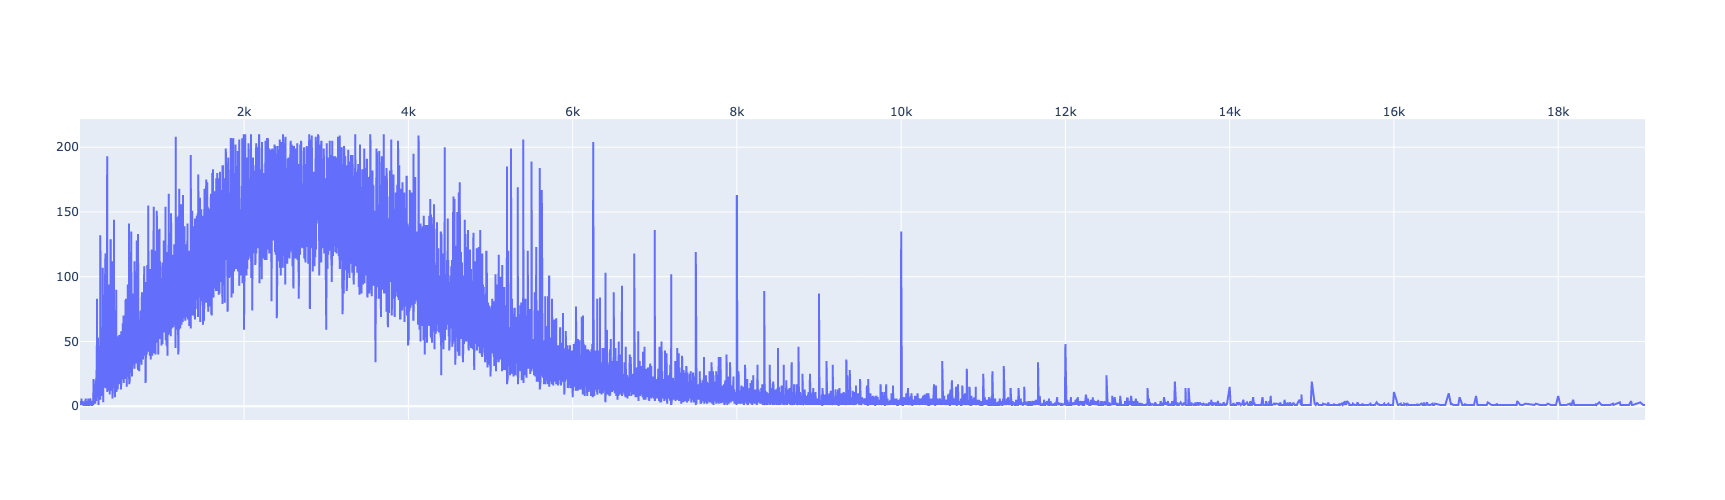

'cost_hour.html'

In [253]:
fig=make_subplots(
        specs=[[{"secondary_y": True}]])   

fig.update_layout(xaxis2= {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
                  yaxis_domain=[0, 0.94]);

fig.add_trace(
    go.Scatter(x=cost_hour_count_trim['cost/hour'], y=cost_hour_count_trim['count'], name="cost/hour"),
    secondary_y=False
)

# fig.add_trace(
#     go.Scatter(x=cost_hour['date'], y=cost_hour['visitor_7ma'], name="visitor"),
#     secondary_y=True
# )

fig.data[0].update(xaxis='x2')
fig.update_layout(width=2200, height=500)


fig.show()

# fig.show()
plot(fig, filename='cost_hour.html')